# First Traval

link : https://www.graphusergroup.com/graph-travel-1/


## 1. GRaph & Subgraph & Degree

- node란 graph의 구성 요소이자 하나의 점으로 표현되는 개별 항목
- 추천시스템에서는 유저와 아이템을 노드라고 할 수 있음

- edge란 두 노드 간의 연결 관계를 나타낸다. 
- 추천시스템에서는 유저와 아이템 구매를 엣지로 연결할 수 있음
- 유저 노드와 아이템 노드가 선으로 연결

In [1]:
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [2]:
# cora 데이터셋 로드

dataset = Planetoid(root='/tmp.Cora', name='Cora')
data = dataset[0]

# 데이터셋 형태 확인
data

Processing...
Done!


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [3]:
data.edge_index

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

- x=[2708, 1433]: 각각 노드의 수 (2708개)와 각 노드에 연결된 특성의 수 (1433개)를 나타냅니다. 즉, 이 데이터셋에서는 총 2708개의 논문이 있으며, 각 논문은 1433개의 특성으로 표현됩니다.
- edge_index=[2, 10556]: 그래프의 엣지 정보를 저장한 리스트를 나타냅니다. 여기서 2는 두 노드를 연결하는 엣지를 나타내며, 10556은 총 엣지의 수를 나타냅니다. 그래프에서 엣지는 논문들 간의 인용 관계를 의미합니다.
- y=[2708]: 각 노드의 label 정보를 나타냅니다. 즉, 각 논문의 주제 분류 레이블이 담겨 있습니다.
- train_mask=[2708], val_mask=[2708], test_mask=[2708]: 각각 훈련, 검증, 테스트 세트를 구성하는 노드를 나타내는 boolean 마스크입니다.

### Graph & Degree

데이터로 그래프 시각화 

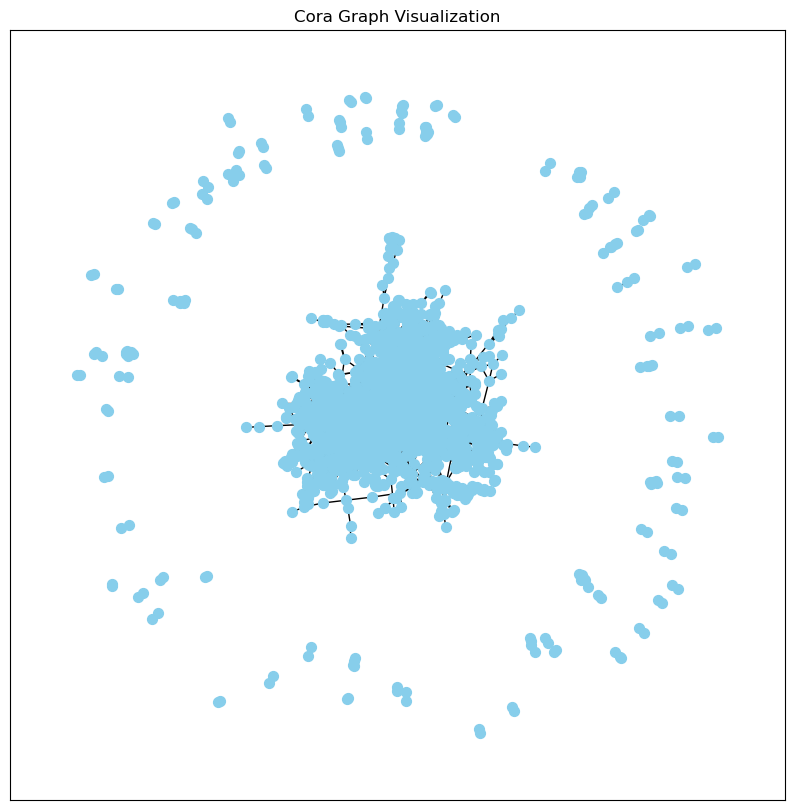

In [13]:
 # torch_geometric의 데이터를 NetworkX 그래프로 변환
edge_index = data.edge_index
edges = edge_index.t().numpy()
graph_nx = nx.from_edgelist(edges, create_using=nx.Graph())

# 그래프 그리기
plt.figure(figsize=(10,10))
pos = nx.spring_layout(graph_nx, seed=42) # spring layout 사용
nx.draw_networkx(graph_nx, pos, with_labels=False, node_size=50, node_color="skyblue")
plt.title("Cora Graph Visualization")
plt.show()

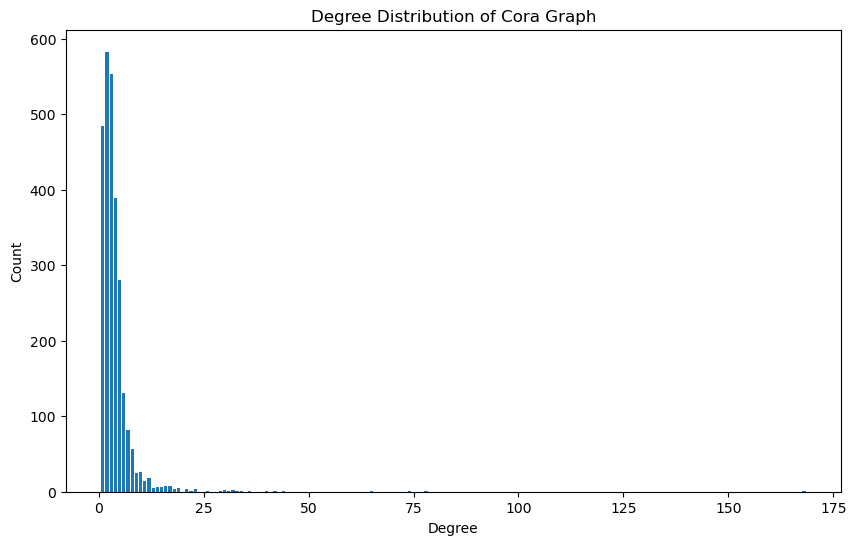

In [14]:
 # node degree 계산
degrees = [degree for node, degree in nx.degree(graph_nx)]
degree_count = Counter(degrees)

# Degree 분포 출력
plt.figure(figsize=(10, 6))
plt.bar(degree_count.keys(), degree_count.values())
plt.title("Degree Distribution of Cora Graph")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

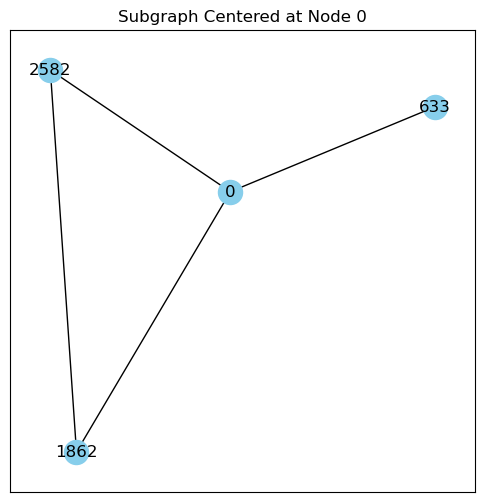

node degree(0) = 3


In [15]:
 # 특정 노드를 선택
selected_node = 0

# 선택한 노드와 직접적으로 연결된 노드들만으로 구성된 subgraph를 추출
neighbors = list(graph_nx.neighbors(selected_node))
neighbors.append(selected_node)
subgraph_nx = graph_nx.subgraph(neighbors)

# 그래프 그리기
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(subgraph_nx, seed=42)  # Spring layout 사용
nx.draw_networkx(subgraph_nx, pos, with_labels=True, node_color="skyblue")
plt.title("Subgraph Centered at Node {}".format(selected_node))
plt.show()

# node degree 출력
print(f"node degree({selected_node}) = {subgraph_nx.degree[selected_node]}")

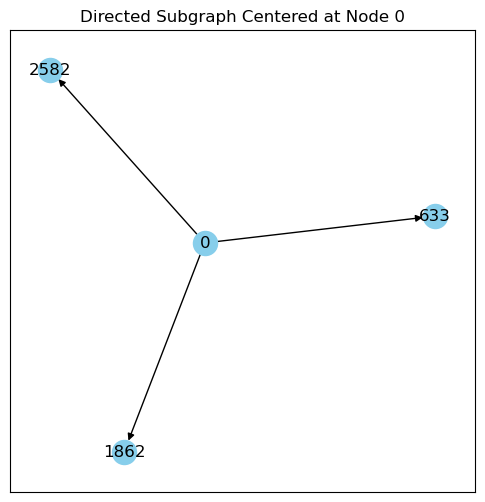

node out-degree(0) = 3
node in-degree(0) = 0


In [16]:
 # 특정 노드를 선택
selected_node = 0

# 선택한 노드와 직접적으로 연결된 노드들만으로 구성된 서브그래프를 추출
neighbors = list(graph_nx.neighbors(selected_node))
neighbors.append(selected_node)
subgraph_nx = graph_nx.subgraph(neighbors)

# 서브그래프를 방향성 그래프로 변환
subgraph_nx_directed = nx.DiGraph()

# 선택된 노드에서 그 이웃 노드들로 향하는 방향성 추가
for neighbor in neighbors:
    if neighbor != selected_node:
        subgraph_nx_directed.add_edge(selected_node, neighbor)

# 그래프 그리기
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(subgraph_nx_directed, seed=42)  # Spring layout 사용
nx.draw_networkx(subgraph_nx_directed, pos, with_labels=True, node_color="skyblue", arrows=True)
plt.title("Directed Subgraph Centered at Node {}".format(selected_node))
plt.show()

# node degree 출력
print(f"node out-degree({selected_node}) = {subgraph_nx_directed.out_degree[selected_node]}")
print(f"node in-degree({selected_node}) = {subgraph_nx_directed.in_degree[selected_node]}")

Processing...
Done!


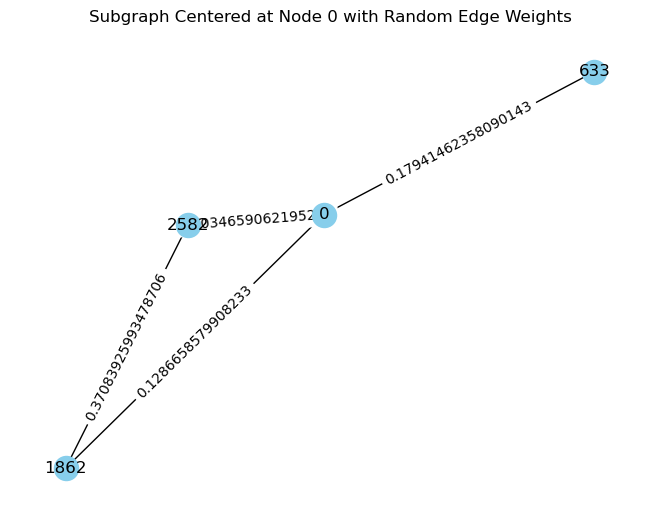

node degree(0) = 3


In [17]:
# Cora 데이터셋 로드
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

# torch_geometric의 데이터를 NetworkX 그래프로 변환
edge_index = data.edge_index
edges = edge_index.t().numpy()
graph_nx = nx.from_edgelist(edges, create_using=nx.Graph())

# 특정 노드를 선택
selected_node = 0

# 선택한 노드와 직접적으로 연결된 노드들만으로 구성된 subgraph를 추출
neighbors = list(graph_nx.neighbors(selected_node))
neighbors.append(selected_node)
subgraph_nx = graph_nx.subgraph(neighbors)

# edge의 수만큼 무작위 가중치를 생성하고, 이를 각 edge의 가중치로 설정
weights = np.random.rand(subgraph_nx.number_of_edges())
for i, edge in enumerate(subgraph_nx.edges):
    subgraph_nx.edges[edge]['weight'] = weights[i]

# 그래프 그리기
pos = nx.spring_layout(subgraph_nx, seed=42)  # Spring layout 사용
nx.draw(subgraph_nx, pos, with_labels=True, node_color="skyblue")

# edge의 가중치를 그래프에 표시
edge_labels = nx.get_edge_attributes(subgraph_nx, 'weight')
nx.draw_networkx_edge_labels(subgraph_nx, pos, edge_labels=edge_labels)

plt.title("Subgraph Centered at Node {} with Random Edge Weights".format(selected_node))
plt.show()

# node degree 출력
print(f"node degree({selected_node}) = {subgraph_nx.degree[selected_node]}")

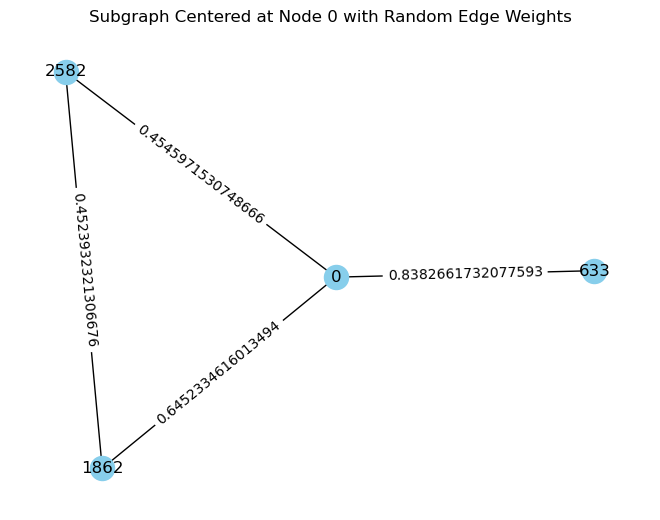

node degree(0) = 3
Is subgraph centered at node 0 connected? True


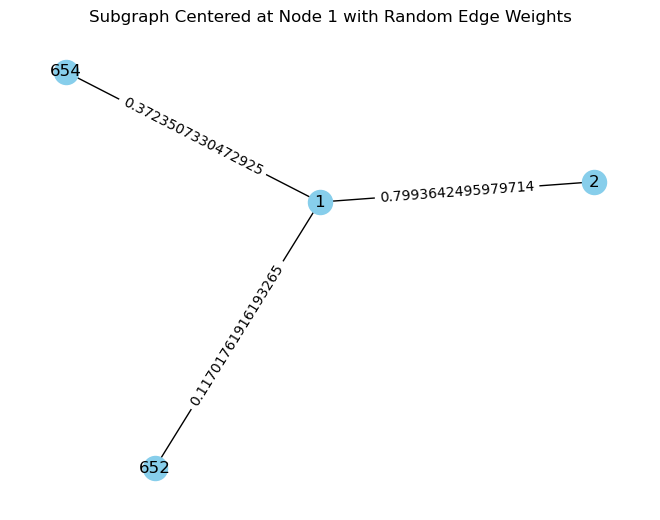

node degree(1) = 3
Is subgraph centered at node 1 connected? True


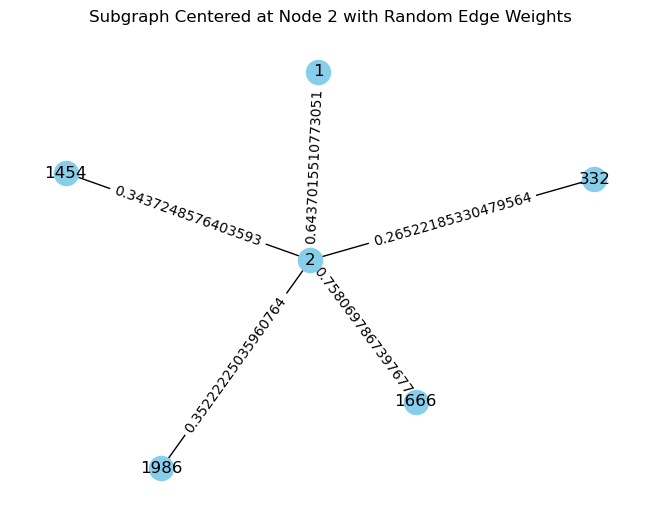

node degree(2) = 5
Is subgraph centered at node 2 connected? True


In [18]:
 # 중심 노드를 선택 (여기서는 0, 1, 2를 선택)
center_nodes = [0, 1, 2]

for i, selected_node in enumerate(center_nodes):
    # 선택한 노드와 직접적으로 연결된 노드들만으로 구성된 subgraph를 추출
    neighbors = list(graph_nx.neighbors(selected_node))
    neighbors.append(selected_node)
    subgraph_nx = graph_nx.subgraph(neighbors)

    # edge의 수만큼 무작위 가중치를 생성하고, 이를 각 edge의 가중치로 설정
    weights = np.random.rand(subgraph_nx.number_of_edges())
    for i, edge in enumerate(subgraph_nx.edges):
        subgraph_nx.edges[edge]['weight'] = weights[i]

    # 그래프 그리기
    plt.figure(i)
    pos = nx.spring_layout(subgraph_nx, seed=42)  # Spring layout 사용
    nx.draw(subgraph_nx, pos, with_labels=True, node_color="skyblue")

    # edge의 가중치를 그래프에 표시
    edge_labels = nx.get_edge_attributes(subgraph_nx, 'weight')
    nx.draw_networkx_edge_labels(subgraph_nx, pos, edge_labels=edge_labels)

    plt.title("Subgraph Centered at Node {} with Random Edge Weights".format(selected_node))
    plt.show()

    # node degree 출력
    print(f"node degree({selected_node}) = {subgraph_nx.degree[selected_node]}")

    # 서브그래프의 연결성 확인
    print(f"Is subgraph centered at node {selected_node} connected? {nx.is_connected(subgraph_nx)}")

node degree(0) = 3
node degree(1) = 3
node degree(2) = 5
Is subgraph connected? False


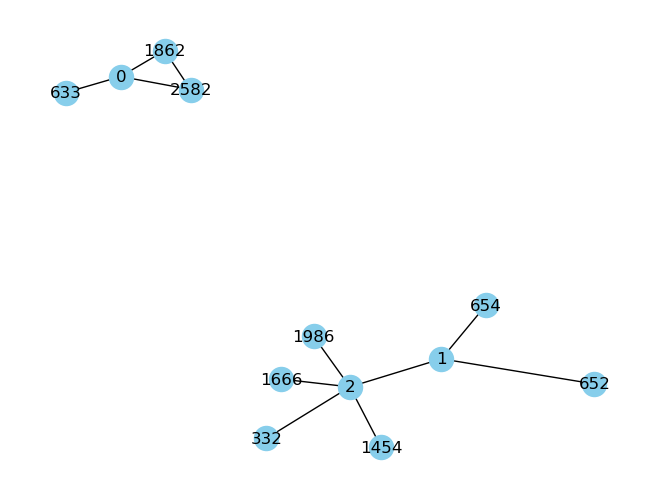

In [20]:
 # 중심 노드를 선택 (여기서는 1, 2를 선택)
center_nodes = [0, 1, 2]

# 모든 이웃 노드를 저장할 리스트 초기화
all_neighbors = []

# 중심 노드들의 모든 이웃 노드를 all_neighbors에 추가
for selected_node in center_nodes:
    neighbors = list(graph_nx.neighbors(selected_node))
    all_neighbors += neighbors

# 중심 노드들도 all_neighbors에 추가
all_neighbors += center_nodes

# all_neighbors에 포함된 모든 노드들만으로 구성된 subgraph를 추출
subgraph_nx = graph_nx.subgraph(all_neighbors)

# 그래프 그리기
pos = nx.spring_layout(subgraph_nx, seed=42)  # Spring layout 사용
nx.draw(subgraph_nx, pos, with_labels=True, node_color="skyblue")

# node degree 출력
for selected_node in center_nodes:
    print(f"node degree({selected_node}) = {subgraph_nx.degree[selected_node]}")

# 그래프의 연결성 확인
print(f"Is subgraph connected? {nx.is_connected(subgraph_nx)}")

plt.show()


## Centrality

In [21]:
 # Degree Centrality
degree_centrality = nx.degree_centrality(subgraph_nx)
print(f"Degree Centrality: {degree_centrality[0]}")  # 노드 0에 대해서만 계산

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(subgraph_nx)
print(f"Betweenness Centrality: {betweenness_centrality[0]}") # 노드 0에 대해서만 계산

# Eigenvector Centrality
# eigenvector_centrality = nx.eigenvector_centrality(subgraph_nx)
# print(f"Eigenvector Centrality: {eigenvector_centrality[0]}") # 노드 0에 대해서만 계산

# Closeness Centrality
# 우리의 subgraph에서는 에러를 일으킵니다. 작동하지 않아요!
closeness_centrality = nx.closeness_centrality(subgraph_nx)
print(f"Closeness Centrality: {closeness_centrality[0]}") # 노드 0에 대해서만 계산

Degree Centrality: 0.2727272727272727
Betweenness Centrality: 0.03636363636363636
Closeness Centrality: 0.2727272727272727


### Density & Adjacency Matrix

그래프의 복잡성을 수치화

In [22]:
 # 그래프의 Density 계산
density = nx.density(subgraph_nx)
print(f"Density: {density}")

# Adjacency Matrix 만들기
adj_matrix = nx.adjacency_matrix(subgraph_nx)

# Adjacency Matrix 출력하기
print("Adjacency Matrix:")
print(adj_matrix.todense())  # .todense()를 사용하여 sparse matrix를 dense matrix로 변환


Density: 0.16666666666666666
Adjacency Matrix:
[[0.         0.         0.         0.         0.         0.64523346
  0.         0.         0.         0.         0.45459715 0.83826617]
 [0.         0.         0.64370155 0.         0.         0.
  0.11701762 0.         0.37235073 0.         0.         0.        ]
 [0.         0.64370155 0.         0.75806979 0.35222225 0.
  0.         0.26522185 0.         0.34372486 0.         0.        ]
 [0.         0.         0.75806979 0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.35222225 0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.64523346 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.45239323 0.        ]
 [0.         0.11701762 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.26522185 0.     

밀도가 0.167이 나왔다. 이는 가능한 모든 엣지 중 약 16.7%만이 실제로 연결되어 있음을 의미